# Importing Packages

In [2]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

# Importing dataset

In [3]:
Financial_data = pd.read_csv("D:\\Personal files\\Data science and AI\\AMUC\\Financial data.csv", header=None, engine='python')

In [4]:
Financial_data.columns = ["Sentiment", "News Headline"]

In [5]:
Financial_data

,Sentiment,News Headline
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...
...,...,...
4841,negative,LONDON MarketWatch -- Share prices ended lower...
4842,neutral,Rinkuskiai 's beer sales fell by 6.5 per cent ...
4843,negative,Operating profit fell to EUR 35.4 mn from EUR ...
4844,negative,Net sales of the Paper segment decreased to EU...


In [6]:
Financial_data = Financial_data[Financial_data.Sentiment != 'neutral']

Financial_data

,Sentiment,News Headline
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...
5,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...
6,positive,"For the last quarter of 2010 , Componenta 's n..."
...,...,...
4840,negative,HELSINKI Thomson Financial - Shares in Cargote...
4841,negative,LONDON MarketWatch -- Share prices ended lower...
4843,negative,Operating profit fell to EUR 35.4 mn from EUR ...
4844,negative,Net sales of the Paper segment decreased to EU...


In [6]:
x = pd.DataFrame(Financial_data, columns = ['News Headline'])

x

,News Headline
2,The international electronic industry company ...
3,With the new production plant the company woul...
4,According to the company 's updated strategy f...
5,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...
6,"For the last quarter of 2010 , Componenta 's n..."
...,...
4840,HELSINKI Thomson Financial - Shares in Cargote...
4841,LONDON MarketWatch -- Share prices ended lower...
4843,Operating profit fell to EUR 35.4 mn from EUR ...
4844,Net sales of the Paper segment decreased to EU...


In [7]:
y = pd.DataFrame(Financial_data, columns = ['Sentiment'])

y

,Sentiment
2,negative
3,positive
4,positive
5,positive
6,positive
...,...
4840,negative
4841,negative
4843,negative
4844,negative


# Data Visualization

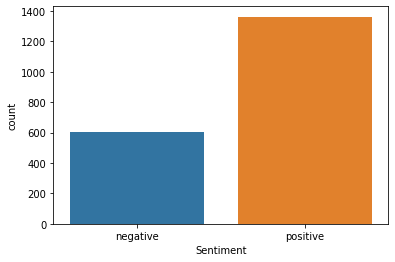

In [8]:
sns.countplot(Financial_data.Sentiment)

# Data Preprocessing

In [9]:
from sklearn.preprocessing import LabelEncoder

LabelEncoder_1 = LabelEncoder()

y = LabelEncoder_1.fit_transform(y)

C:\Users\hashw\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Data Validation

In [10]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [11]:
y_train

array([1, 1, 0, ..., 1, 0, 1])

# Modeling

In [12]:
from sklearn import feature_extraction

count_vectorizer = feature_extraction.text.TfidfVectorizer()

In [13]:
x_train = count_vectorizer.fit_transform(x_train["News Headline"])

x_train

<1573x4855 sparse matrix of type '<class 'numpy.float64'>'
	with 29300 stored elements in Compressed Sparse Row format>

In [14]:
x_test = count_vectorizer.transform(x_test["News Headline"])

x_test

<394x4855 sparse matrix of type '<class 'numpy.float64'>'
	with 6724 stored elements in Compressed Sparse Row format>

ANN

In [15]:
from keras.models import Sequential

from keras.layers import Dense

Using TensorFlow backend.


In [16]:
model = Sequential()

model

In [17]:
x_train.shape

(1573, 4855)

In [18]:
# Input Layer

model.add(Dense(input_dim=x_train.shape[1],kernel_initializer="random_uniform",activation="relu",units=200))  

In [19]:
# Hidden Layer

model.add(Dense(kernel_initializer="random_uniform",activation="relu",units=106))

In [20]:
# Output Layer
 
model.add(Dense(kernel_initializer="random_uniform",activation="sigmoid",units=1))

In [21]:
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"]) 

In [22]:
model.fit(x_train, y_train, epochs=25, batch_size=32)

Epoch 1/25
1573/1573 [==============================] - 1s 547us/step - loss: 0.6323 - accuracy: 0.6904
Epoch 2/25
1573/1573 [==============================] - 1s 453us/step - loss: 0.4389 - accuracy: 0.6929
Epoch 3/25
1573/1573 [==============================] - 1s 451us/step - loss: 0.2690 - accuracy: 0.8748
Epoch 4/25
1573/1573 [==============================] - 1s 502us/step - loss: 0.1881 - accuracy: 0.9847
Epoch 5/25
1573/1573 [==============================] - 1s 455us/step - loss: 0.0991 - accuracy: 0.9962
Epoch 6/25
1573/1573 [==============================] - 1s 465us/step - loss: 0.0301 - accuracy: 0.9962
Epoch 7/25
1573/1573 [==============================] - 1s 496us/step - loss: 0.0114 - accuracy: 0.9981
Epoch 8/25
1573/1573 [==============================] - 1s 509us/step - loss: 0.0055 - accuracy: 0.9994
Epoch 9/25
1573/1573 [==============================] - 1s 465us/step - loss: 0.0027 - accuracy: 1.0000
Epoch 10/25
1573/1573 [==============================] - 1s 475u

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 200)               971200    
_________________________________________________________________
dense_2 (Dense)              (None, 106)               21306     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 107       
Total params: 992,613
Trainable params: 992,613
Non-trainable params: 0
_________________________________________________________________


# Prediction

In [24]:
y_pred = model.predict(x_test)

In [25]:
y_pred = y_pred.astype(int)

y_pred = pd.DataFrame(y_pred)

y_pred

y_pred.columns = ["Sentiment"]

y_pred

y_pred["Sentiment"].replace({0: "Negative", 1: "Positive"}, inplace=True)

y_pred

,Sentiment
0,Negative
1,Positive
2,Negative
3,Negative
4,Negative
...,...
389,Negative
390,Positive
391,Positive
392,Negative


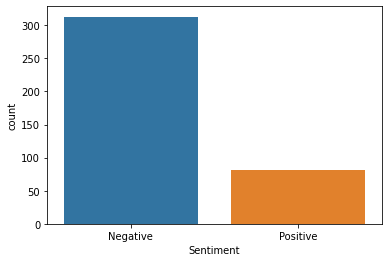

In [26]:
sns.countplot(y_pred.Sentiment)

# NLP on TATA(TATAMOTORS) News

In [27]:
tata_data = pd.read_csv("D:\\Personal files\\Data science and AI\\AMUC\\tata.csv", header=None, engine='python')

In [28]:
tata_data.columns = ["News Headline"]

In [29]:
tata_data

,News Headline
0,Tata companies supplied thousands of face mas...
1,Tata companies and Tata Trusts continue to sup...
2,Tata Global Beverages Limited to be renamed Ta...
3,Tata Motors shares flat in early trade
4,Tata Motors shares slip 2%
5,Tata Motors shares surge 9%
6,Tata Motors shares rise over 2%


In [30]:
tata_data_tf = count_vectorizer.transform(tata_data["News Headline"])

tata_data_tf

<7x4855 sparse matrix of type '<class 'numpy.float64'>'
	with 41 stored elements in Compressed Sparse Row format>

In [31]:
tata_data_tf.shape

(7, 4855)

In [32]:
tata_y_pred = model.predict(tata_data_tf)> 0.5

tata_y_pred

array([[ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True]])

In [33]:
tata_y_pred = tata_y_pred.astype(int)

tata_y_pred = pd.DataFrame(tata_y_pred)

tata_y_pred

tata_y_pred.columns = ["Sentiment"]

tata_y_pred

tata_y_pred["Sentiment"].replace({0: "Negative", 1: "Positive"}, inplace=True)

tata_y_pred

,Sentiment
0,Positive
1,Positive
2,Positive
3,Negative
4,Negative
5,Negative
6,Positive


In [34]:
tata_news_predictions = pd.concat([tata_y_pred, tata_data], axis=1)

tata_news_predictions

,Sentiment,News Headline
0,Positive,Tata companies supplied thousands of face mas...
1,Positive,Tata companies and Tata Trusts continue to sup...
2,Positive,Tata Global Beverages Limited to be renamed Ta...
3,Negative,Tata Motors shares flat in early trade
4,Negative,Tata Motors shares slip 2%
5,Negative,Tata Motors shares surge 9%
6,Positive,Tata Motors shares rise over 2%


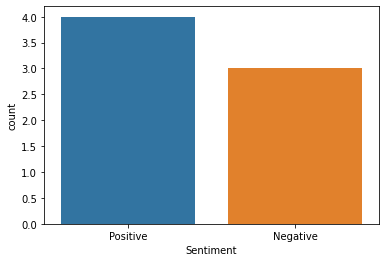

In [35]:
sns.countplot(tata_news_predictions.Sentiment)

In [36]:
tata_news_predictions.to_csv('D:\\Personal files\\Data science and AI\\AMUC\\\\tata_news_predictions.csv')

# NLP on Fortis(FORTIS) news

In [37]:
Fortis_data = pd.read_csv("D:\\Personal files\\Data science and AI\\AMUC\\Fortis.csv", header=None, engine='python')

In [38]:
Fortis_data.columns = ["News Headline"]

In [39]:
Fortis_data

,News Headline
0,Fortis and Religare 'vehemently' oppose sale o...
1,Hospitals gear up to keep the virtual OPDs run...
2,Hospitals should be back to normal in another ...
3,Q1 results: Posts net loss of Rs 188 cr
4,"Fortis Healthcare rechristened as Parkway, old..."
5,Shortage of donors impacts use of plasma therapy
6,Fortis Healthcare shares rise nearly 1%


In [40]:
Fortis_data_tf = count_vectorizer.transform(Fortis_data["News Headline"])

Fortis_data_tf

<7x4855 sparse matrix of type '<class 'numpy.float64'>'
	with 43 stored elements in Compressed Sparse Row format>

In [41]:
Fortis_data_tf.shape

(7, 4855)

In [42]:
Fortis_y_pred = model.predict(tata_data_tf)> 0.5

Fortis_y_pred

array([[ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True]])

In [43]:
Fortis_y_pred = Fortis_y_pred.astype(int)

Fortis_y_pred = pd.DataFrame(Fortis_y_pred)

Fortis_y_pred

Fortis_y_pred.columns = ["Sentiment"]

Fortis_y_pred

Fortis_y_pred["Sentiment"].replace({0: "Negative", 1: "Positive"}, inplace=True)

Fortis_y_pred

,Sentiment
0,Positive
1,Positive
2,Positive
3,Negative
4,Negative
5,Negative
6,Positive


In [44]:
Fortis_news_predictions = pd.concat([Fortis_y_pred, Fortis_data], axis=1)

Fortis_news_predictions

,Sentiment,News Headline
0,Positive,Fortis and Religare 'vehemently' oppose sale o...
1,Positive,Hospitals gear up to keep the virtual OPDs run...
2,Positive,Hospitals should be back to normal in another ...
3,Negative,Q1 results: Posts net loss of Rs 188 cr
4,Negative,"Fortis Healthcare rechristened as Parkway, old..."
5,Negative,Shortage of donors impacts use of plasma therapy
6,Positive,Fortis Healthcare shares rise nearly 1%


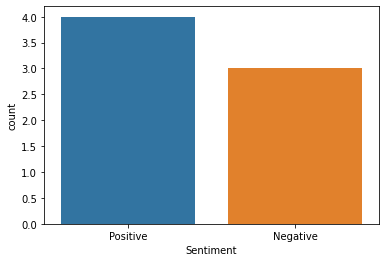

In [45]:
sns.countplot(Fortis_news_predictions.Sentiment)

In [46]:
Fortis_news_predictions.to_csv('D:\\Personal files\\Data science and AI\\AMUC\\\\Fortis_news_predictions.csv')

# NLP on Novartis(NOVN) news

In [47]:
Novartis_data = pd.read_csv("D:\\Personal files\\Data science and AI\\AMUC\\Novartis.csv", header=None, engine='python')

In [48]:
Novartis_data.columns = ["News Headline"]

In [49]:
Novartis_data

,News Headline
0,Bringing science and medicine together to help...
1,European Medicines Agency (EMA) approves safet...
2,Novartis reports positive topline results from...
3,New collaboration between Novartis and Africa ...
4,Novartis announces ambitious ESG targets to in...
5,Novartis announces positive results from Phase...
6,The coronavirus is giving health and pharma co...


In [50]:
Novartis_data_tf = count_vectorizer.transform(Novartis_data["News Headline"])

Novartis_data_tf

<7x4855 sparse matrix of type '<class 'numpy.float64'>'
	with 62 stored elements in Compressed Sparse Row format>

In [51]:
Novartis_data_tf.shape

(7, 4855)

In [52]:
Novartis_y_pred = model.predict(Novartis_data_tf)> 0.5

Novartis_y_pred

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [53]:
Novartis_y_pred = Novartis_y_pred.astype(int)

Novartis_y_pred = pd.DataFrame(Novartis_y_pred)

Novartis_y_pred

Novartis_y_pred.columns = ["Sentiment"]

Novartis_y_pred

Novartis_y_pred["Sentiment"].replace({0: "Negative", 1: "Positive"}, inplace=True)

Novartis_y_pred

,Sentiment
0,Positive
1,Positive
2,Positive
3,Positive
4,Positive
5,Positive
6,Positive


In [54]:
Novartis_news_predictions = pd.concat([Novartis_y_pred, Novartis_data], axis=1)

Novartis_news_predictions

,Sentiment,News Headline
0,Positive,Bringing science and medicine together to help...
1,Positive,European Medicines Agency (EMA) approves safet...
2,Positive,Novartis reports positive topline results from...
3,Positive,New collaboration between Novartis and Africa ...
4,Positive,Novartis announces ambitious ESG targets to in...
5,Positive,Novartis announces positive results from Phase...
6,Positive,The coronavirus is giving health and pharma co...


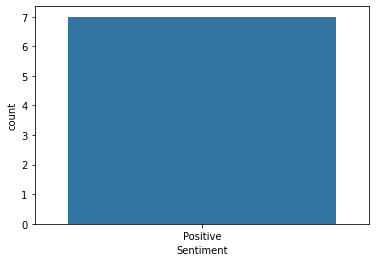

In [55]:
sns.countplot(Novartis_news_predictions.Sentiment)

In [56]:
Novartis_news_predictions.to_csv('D:\\Personal files\\Data science and AI\\AMUC\\\\Novartis_news_predictions.csv')